In [1]:
# Cell 1: Imports
import pandas as pd
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
# Cell 2: Table 1 - Record Summary
record_data = [
    ["ALL GAMES", "17-4", "8-1", "6-2", "3-1"],
    ["CONFERENCE", "8-2", "5-1", "3-1", "0-0"],
    ["NON-CONFERENCE", "9-2", "3-0", "3-1", "3-1"]
]
record_columns = ["Category", "Overall", "Home", "Away", "Neutral"]
record_df = pd.DataFrame(record_data, columns=record_columns)

display(Markdown("### 🏆 Table 1: Record Summary"))
display(record_df)

### 🏆 Table 1: Record Summary

,Category,Overall,Home,Away,Neutral
0,ALL GAMES,17-4,8-1,6-2,3-1
1,CONFERENCE,8-2,5-1,3-1,0-0
2,NON-CONFERENCE,9-2,3-0,3-1,3-1


In [3]:
# Cell 3: Table 2 - Game Results (Subset)
game_data = [
    ["Feb 20", "at #4 Loyola Maryland", "W", "18-6", 0],
    ["Feb 27", "#5 STONY BROOK", "W", "16-6", 0],
    ["Mar 06", "at #10 Duke", "W", "15-5", 0],
    ["Apr 3", "at #1 North Carolina", "L", "6-17", 609],
    ["May 30", "vs #4 Boston College", "L", "10-16", 5405]
]
game_columns = ["Date", "Opponent", "Result", "Score", "Attendance"]
game_df = pd.DataFrame(game_data, columns=game_columns)

display(Markdown("### 📅 Table 2: Sample Game Results"))
display(game_df)

### 📅 Table 2: Sample Game Results

,Date,Opponent,Result,Score,Attendance
0,Feb 20,at #4 Loyola Maryland,W,18-6,0
1,Feb 27,#5 STONY BROOK,W,16-6,0
2,Mar 06,at #10 Duke,W,15-5,0
3,Apr 3,at #1 North Carolina,L,6-17,609
4,May 30,vs #4 Boston College,L,10-16,5405


In [4]:
# Cell 4: Simple Statistics
# Number of wins and losses
wins = game_df[game_df["Result"] == "W"].shape[0]
losses = game_df[game_df["Result"] == "L"].shape[0]
display(Markdown(f"**Summary:** The team won `{wins}` games and lost `{losses}` games in the shown subset."))

**Summary:** The team won `3` games and lost `2` games in the shown subset.

In [5]:
# Cell 5: Preprocessing Score into two separate numeric columns
game_df[['Team_Score', 'Opponent_Score']] = game_df['Score'].str.split('-', expand=True).astype(int)
game_df['Score_Diff'] = game_df['Team_Score'] - game_df['Opponent_Score']

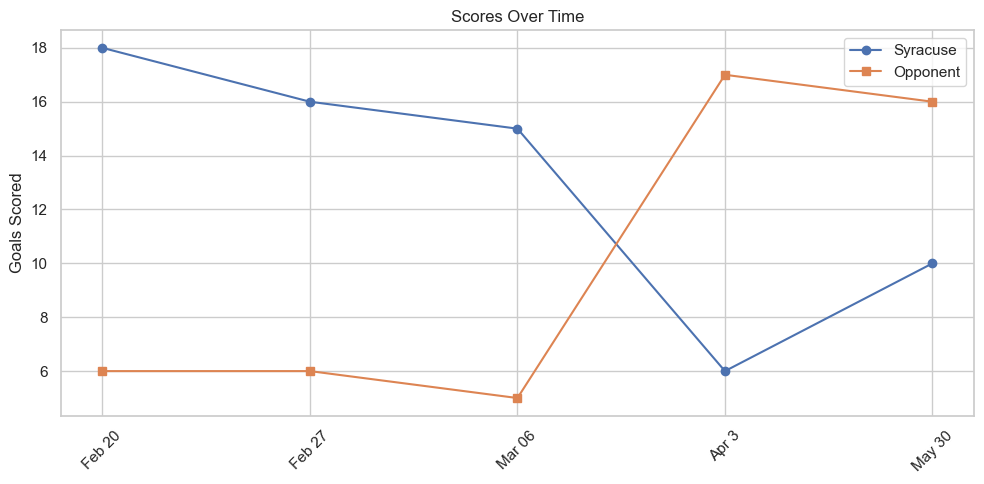

In [6]:
# Cell 6: Line plot – Team vs Opponent Score per Game
plt.figure(figsize=(10, 5))
plt.plot(game_df['Date'], game_df['Team_Score'], marker='o', label='Syracuse')
plt.plot(game_df['Date'], game_df['Opponent_Score'], marker='s', label='Opponent')
plt.xticks(rotation=45)
plt.title('Scores Over Time')
plt.ylabel('Goals Scored')
plt.legend()
plt.tight_layout()
plt.show()

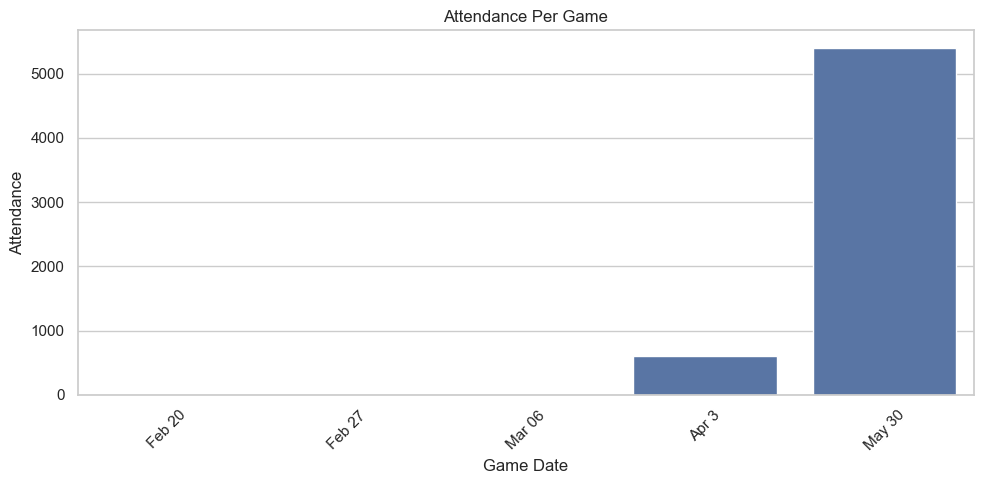

In [7]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Date', y='Attendance', data=game_df)
plt.xticks(rotation=45)
plt.title('Attendance Per Game')
plt.xlabel('Game Date')
plt.ylabel('Attendance')
plt.tight_layout()
plt.show()

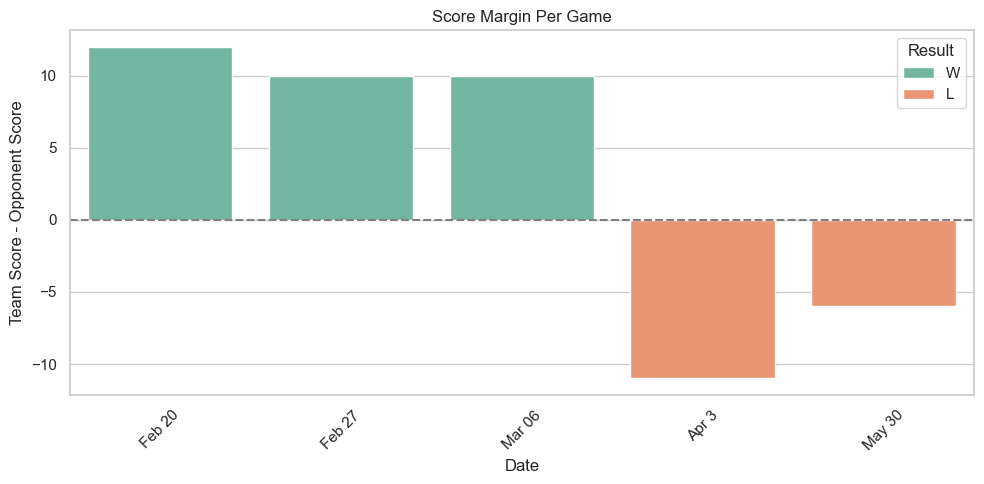

In [8]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Date', y='Score_Diff', data=game_df, hue='Result', palette='Set2')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Score Margin Per Game')
plt.xticks(rotation=45)
plt.ylabel('Team Score - Opponent Score')
plt.tight_layout()
plt.show()